In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,...,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,accuracy
0,1,4.000000e-06,0.766908,0.711654,0.155184,0.157536,0.162746,0.168606,0.176388,0.188955,...,0.283538,0.302475,0.274022,0.148041,0.025117,0.000306,0.000000,0.000000,0.000000,0.663073
1,2,6.894754e-06,0.714982,0.687813,0.154252,0.155330,0.159148,0.171734,0.190315,0.203335,...,0.307876,0.321619,0.189470,0.033191,0.000573,0.000000,0.000000,0.000000,0.000000,0.724718
2,3,1.522987e-05,0.664913,0.631119,0.166005,0.184728,0.228044,0.267638,0.286255,0.303328,...,0.351335,0.367064,0.356366,0.306127,0.219755,0.122000,0.048965,0.009113,0.000579,0.801454
3,4,2.800000e-05,0.623818,1.468574,0.159781,0.171444,0.172774,0.169471,0.161203,0.146180,...,0.085667,0.058233,0.040763,0.028261,0.019110,0.012112,0.007383,0.003940,0.001224,0.635894
4,5,4.366489e-05,0.598050,0.628338,0.191331,0.226013,0.234984,0.243319,0.249603,0.255468,...,0.292611,0.319509,0.312934,0.303546,0.290561,0.274514,0.246056,0.206053,0.146756,0.793954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,91,2.447564e-06,0.172229,0.723065,0.364029,0.354637,0.346214,0.338440,0.330967,0.323477,...,0.307886,0.299254,0.290253,0.279960,0.268167,0.254312,0.237185,0.212902,0.168756,0.888034
91,92,1.937307e-06,0.174985,0.728067,0.355522,0.345945,0.337476,0.329700,0.322077,0.314621,...,0.299845,0.291954,0.283236,0.273411,0.262100,0.248536,0.231639,0.208061,0.164557,0.887665
92,93,1.485608e-06,0.168770,0.728159,0.359909,0.350369,0.341798,0.333950,0.326455,0.319053,...,0.303529,0.294693,0.285394,0.275509,0.264354,0.251586,0.235381,0.211700,0.169466,0.887987
93,94,1.093016e-06,0.172513,0.723115,0.368711,0.359116,0.350629,0.342773,0.335230,0.328016,...,0.313133,0.305000,0.295975,0.286225,0.274854,0.261259,0.244011,0.219559,0.175278,0.888264


(0.3, 0.6)

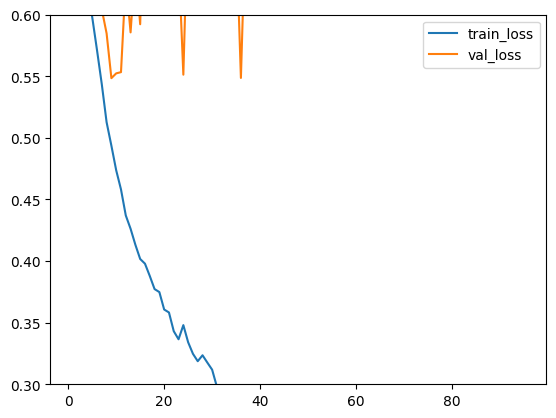

In [2]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
plt.ylim(0.3, 0.6)

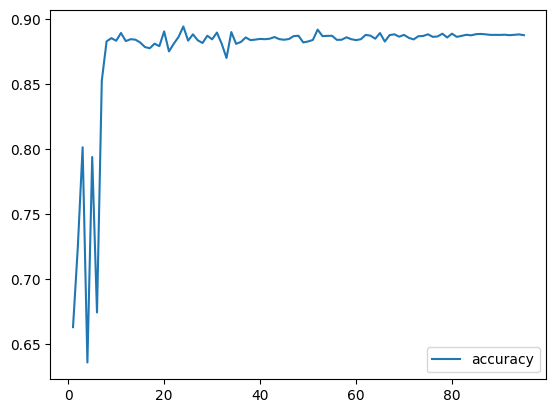

In [3]:
plt.plot(df["epoch"], df["accuracy"], label="accuracy")

plt.legend()
# plt.ylim(0.3, 0.6)

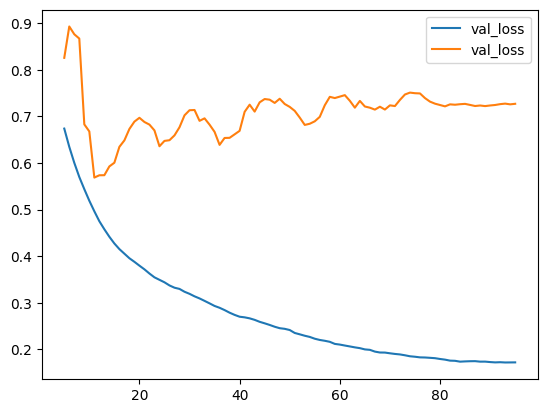

In [4]:
plt.plot(df["epoch"], df["loss_train"].rolling(5).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(5).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(95, 16)


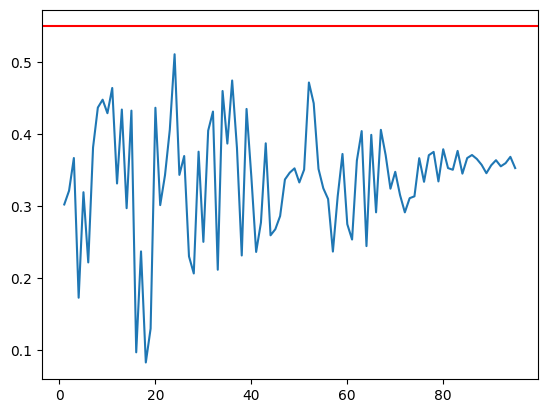

In [5]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

# put horizontal line at 0.55
plt.axhline(y=0.55, color='r', linestyle='-')


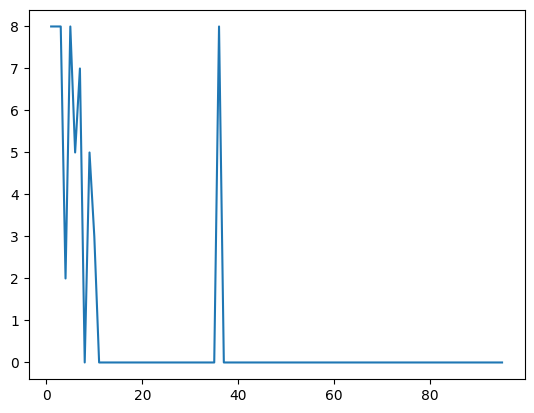

In [6]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")